In [2]:
# import libraries
import pandas as pd
from scipy.stats import ttest_rel
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter
from lifelines.utils import median_survival_times
from lifelines import NelsonAalenFitter

In [3]:
# read in the file that I created in Microsoft Excel containing the dataset of concussions 
# and lower body injuries from the last 10 seasons in the NBA
df = pd.read_excel('Pre and Post Concussion Injury Data.xlsx')

In [4]:
df

,Date of Concussion,End Date of Concussion,Team,Player,Date of First Injury Pre-Concussion,Number of Injuries Pre-Concussion,Games Missed out of Previous 82,Date of First Injury Post Concussion,Number of Injuries Post-Concussion,Games Missed out of Next 82
0,2010-12-20,2011-01-21,Bucks,Carlos Delfino,NaT,1,0,NaT,1,0
1,2011-02-25,2011-02-27,Spurs,Gary Neal,NaT,1,0,NaT,1,0
2,2011-02-26,2011-03-04,Bucks,Ersan Ilyasova,NaT,1,0,NaT,1,0
3,2011-03-07,2011-03-12,Hornets,Chris Paul,NaT,1,0,2012-01-16,1,5
4,2011-04-11,2011-04-13,Warriors,Monta Ellis,NaT,1,0,NaT,1,0
5,2012-01-13,2012-01-13,Bucks,Andrew Bogut,NaT,1,0,NaT,1,0
6,2012-01-18,2012-01-19,Pacers,Jeff Ayres,2012-01-07,1,2,NaT,1,0
7,2012-02-06,2012-03-15,Hornets,Jason Smith,NaT,1,0,2012-04-24,1,1
8,2012-02-08,2012-02-15,Cavaliers,Kyrie Irving,NaT,1,0,NaT,1,0
9,2012-03-03,2012-03-13,Mavericks,Brandan Wright,NaT,1,0,2012-12-20,1,12


In [5]:
# add columns for the proportion of the 82 games before the concussion that were missed
# and the proportion of the 82 games after the concussion that were missed
df.insert(7, "Relative Frequency Missed Pre Concussion", 0)
df.insert(11, "Relative Frequency Missed Post Concussion", 0)

# calculate the proportion of missed games pre and post concussion
df['Relative Frequency Missed Pre Concussion'] = df['Games Missed out of Previous 82'] / 82
df['Relative Frequency Missed Post Concussion'] = df['Games Missed out of Next 82'] / 82

In [6]:
df

,Date of Concussion,End Date of Concussion,Team,Player,Date of First Injury Pre-Concussion,Number of Injuries Pre-Concussion,Games Missed out of Previous 82,Relative Frequency Missed Pre Concussion,Date of First Injury Post Concussion,Number of Injuries Post-Concussion,Games Missed out of Next 82,Relative Frequency Missed Post Concussion
0,2010-12-20,2011-01-21,Bucks,Carlos Delfino,NaT,1,0,0.000000,NaT,1,0,0.000000
1,2011-02-25,2011-02-27,Spurs,Gary Neal,NaT,1,0,0.000000,NaT,1,0,0.000000
2,2011-02-26,2011-03-04,Bucks,Ersan Ilyasova,NaT,1,0,0.000000,NaT,1,0,0.000000
3,2011-03-07,2011-03-12,Hornets,Chris Paul,NaT,1,0,0.000000,2012-01-16,1,5,0.060976
4,2011-04-11,2011-04-13,Warriors,Monta Ellis,NaT,1,0,0.000000,NaT,1,0,0.000000
5,2012-01-13,2012-01-13,Bucks,Andrew Bogut,NaT,1,0,0.000000,NaT,1,0,0.000000
6,2012-01-18,2012-01-19,Pacers,Jeff Ayres,2012-01-07,1,2,0.024390,NaT,1,0,0.000000
7,2012-02-06,2012-03-15,Hornets,Jason Smith,NaT,1,0,0.000000,2012-04-24,1,1,0.012195
8,2012-02-08,2012-02-15,Cavaliers,Kyrie Irving,NaT,1,0,0.000000,NaT,1,0,0.000000
9,2012-03-03,2012-03-13,Mavericks,Brandan Wright,NaT,1,0,0.000000,2012-12-20,1,12,0.146341


In [7]:
# perform a paired t-test (hypothesis test) on the distributions of relative frequency of games missed
# out of 82 pre- and post-concussion games
stat, p = ttest_rel(df['Relative Frequency Missed Pre Concussion'], df['Relative Frequency Missed Post Concussion'])
print('stat=%.5f, p=%.5f' % (stat, p))

stat=-1.35856, p=0.17702


In [8]:
# perform a paired t-test (hypothesis test) on the distributions of number of lower body 
# soft tissue injuries during the year pre- and post-concussion
stat, p = ttest_rel(df['Number of Injuries Pre-Concussion'], df['Number of Injuries Post-Concussion'])
print('stat=%.5f, p=%.5f' % (stat, p))

stat=-1.15246, p=0.25158


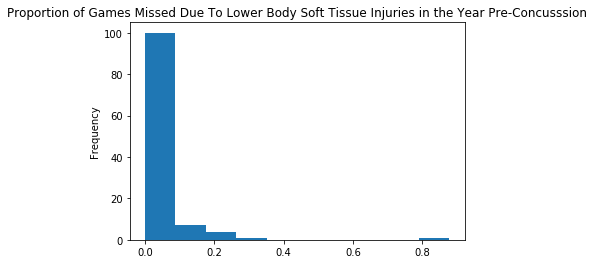

In [24]:
# plot histogram for frequency of games missed 82 games pre-concussion
# due to lower-body soft tissue injuries
x = df['Relative Frequency Missed Pre Concussion']
plt.hist(x, bins = 10)

plt.title("Proportion of Games Missed Due To Lower Body Soft Tissue \
Injuries in the Year Pre-Concusssion")
plt.ylabel("Frequency")
plt.show()

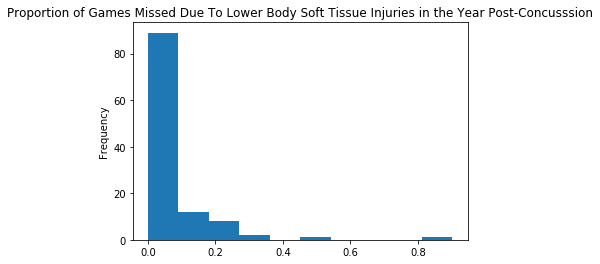

In [25]:
# plot histogram for frequency of games missed 82 games post-concussion
# due to lower-body soft tissue injuries
y = df['Relative Frequency Missed Post Concussion']
plt.hist(y, bins = 10)

plt.title("Proportion of Games Missed Due To Lower Body Soft Tissue Injuries \
in the Year Post-Concusssion")
plt.ylabel("Frequency")
plt.show()

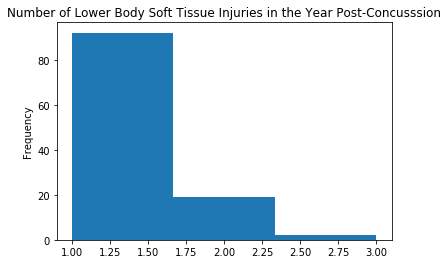

In [11]:
# plot histogram for number of lower body soft tissue
# injuries in the year pre-concussion
y = df['Number of Injuries Pre-Concussion']
plt.hist(y, bins = 3)

plt.title("Number of Lower Body Soft Tissue Injuries in the Year \
Post-Concusssion")
plt.ylabel("Frequency")
plt.show()

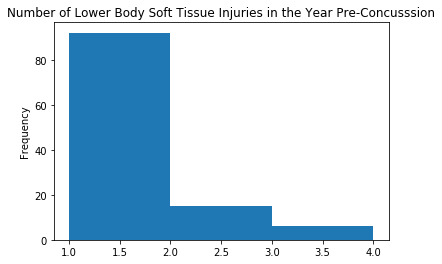

In [12]:
# plot histogram for number of lower body soft tissue
# injuries in the year post-concussion
y = df['Number of Injuries Post-Concussion']
plt.hist(y, bins = 3)

plt.title("Number of Lower Body Soft Tissue Injuries in the Year \
Pre-Concusssion")
plt.ylabel("Frequency")
plt.show()

In [13]:
# Now, we will be creating a survival function based on whether players
# have or have not yet suffered a lower body soft tissue injury

# add in a "duration" and observed column for post-concussion
df.insert(12, "Duration - Post Concussion", 0)
df.insert(13, "Observed - Post Concussion", 1)

#loop over the df and mark whether the event of a lower body soft tissue injury has been observed
for index, row in df.iterrows():
    if pd.isnull(row['Date of First Injury Post Concussion']):
        df.at[index, "Observed - Post Concussion"] = 0
        
# loop over the df and fill in the 'duration' column with the correct value
for index, row in df.iterrows():
    if row['Observed - Post Concussion'] == 1:
        df.at[index, "Duration - Post Concussion"] = (row['Date of First Injury Post Concussion'] - \
        row['End Date of Concussion']).days
    else:
        df.at[index, "Duration - Post Concussion"] = 365


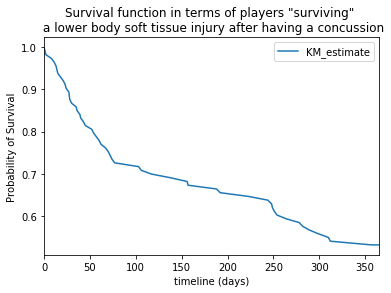

In [14]:
# We can use these two columns to fit the survival function and create a survival curve
kmf = KaplanMeierFitter()
T = df["Duration - Post Concussion"]
E = df["Observed - Post Concussion"]

kmf.fit(T, event_observed=E)
kmf.survival_function_.plot()
plt.ylabel("Probability of Survival")
plt.xlabel("timeline (days)")
plt.title('Survival function in terms of players "surviving" \n a lower \
body soft tissue injury after having a concussion');

In [15]:
# Confidence interval for the median KM estimate
median_ci = median_survival_times(kmf.confidence_interval_)
median_ci

,KM_estimate_lower_0.95,KM_estimate_upper_0.95
0.5,264.0,inf


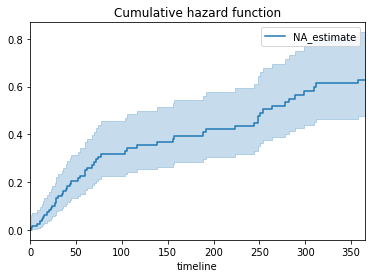

In [16]:
# We are now going to fit a cumulative hazard function over this same data
naf = NelsonAalenFitter()
naf.fit(T,event_observed=E)

naf.fit(T, event_observed=E)
naf.plot()

plt.title("Cumulative hazard function");

In [17]:
naf.cumulative_hazard_

,NA_estimate
timeline,
0.0,0.000000
1.0,0.008850
2.0,0.017778
8.0,0.026787
11.0,0.035878
13.0,0.045052
14.0,0.054312
15.0,0.063657
18.0,0.073091


In [18]:
# Calculate the slope of the Hazard function during different intervals
# We can see that the hazard being experienced by the players is decreasing over time

# Slope (~ within 3 months of the concussion)
S_1 = (0.331197 - 0) / (103 - 0)

# Slope (~ between 3 and 6 months after the concussion)
S_2 = (0.407666 - 0.331197) / (188 - 103)

# Slope (~ between 6 and 12 months after the concussion)
S_3 = (0.629151 - 0.407666) / (365 - 188)

print(S_1, S_2, S_3)

0.003215504854368932 0.0008996352941176466 0.0012513276836158195


In [19]:
# Now, we will be creating a survival function based on whether players
# have or have not yet suffered a lower body soft tissue injury pre-concussion

# add in a "duration" and observed column for pre-concussion
df.insert(14, "Duration - Pre Concussion", 0)
df.insert(15, "Observed - Pre Concussion", 1)

# loop over the df and mark whether the event of a lower body soft tissue injury has been observed
for index, row in df.iterrows():
    if pd.isnull(row['Date of First Injury Pre-Concussion']):
        df.at[index, "Observed - Pre Concussion"] = 0
        
# loop over the df and fill in the 'duration' column with the correct value
for index, row in df.iterrows():
    df['Date of Concussion'] = pd.to_datetime(df['Date of Concussion'])
    if row['Observed - Pre Concussion'] == 1:
        df.at[index, "Duration - Pre Concussion"] = ((row['Date of First Injury Pre-Concussion'] - \
        row['Date of Concussion']).days) + 365
    else:
        df.at[index, "Duration - Pre Concussion"] = 365
        

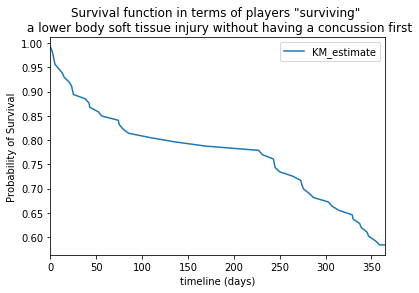

In [20]:
# We can use these two columns to fit the survival function and create a survival curve
kmf = KaplanMeierFitter()
T = df["Duration - Pre Concussion"]
E = df["Observed - Pre Concussion"]

kmf.fit(T, event_observed=E)
kmf.survival_function_.plot()
plt.ylabel("Probability of Survival")
plt.xlabel("timeline (days)")
plt.title('Survival function in terms of players "surviving" \n a lower \
body soft tissue injury without having a concussion first');

In [21]:
# Confidence interval for the median KM estimate
median_ci = median_survival_times(kmf.confidence_interval_)
median_ci

,KM_estimate_lower_0.95,KM_estimate_upper_0.95
0.5,354.0,inf
